from PIL import Image

#Load the image
img = Image.open(r'C:\Users\zyysu\OneDrive\Bureau\MA2\pattern\Image_analysis_project\train_games\game1\1.jpg')

#Get basic details about the image
print(img.format)
print(img.mode)
print(img.size)



In [1]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np

# color detection
tune HSV

In [ ]:
import cv2
import numpy as np
import time
import skimage.io

# A required callback method that goes into the trackbar function.
def nothing(x):
    pass

# Initializing the webcam feed.

# Create a window named trackbars.
cv2.namedWindow("Trackbars")
cv2.resizeWindow('image', 90, 90) 
# Now create 6 trackbars that will control the lower and upper range of 
# H,S and V channels. The Arguments are like this: Name of trackbar, 
# window name, range,callback function. For Hue the range is 0-179 and
# for S,V its 0-255.
cv2.createTrackbar("L - H", "Trackbars", 0, 179, nothing)
cv2.createTrackbar("L - S", "Trackbars", 0, 255, nothing)
cv2.createTrackbar("L - V", "Trackbars", 0, 255, nothing)
cv2.createTrackbar("U - H", "Trackbars", 179, 179, nothing)
cv2.createTrackbar("U - S", "Trackbars", 255, 255, nothing)
cv2.createTrackbar("U - V", "Trackbars", 255, 255, nothing)
 
while True:
    

    frame = skimage.io.imread( "train_games/game1/1.jpg")#train_games\game1\1.jpg
    # Convert the BGR image to HSV image.
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    # Get the new values of the trackbar in real time as the user changes 
    # them
    l_h = cv2.getTrackbarPos("L - H", "Trackbars")
    l_s = cv2.getTrackbarPos("L - S", "Trackbars")
    l_v = cv2.getTrackbarPos("L - V", "Trackbars")
    u_h = cv2.getTrackbarPos("U - H", "Trackbars")
    u_s = cv2.getTrackbarPos("U - S", "Trackbars")
    u_v = cv2.getTrackbarPos("U - V", "Trackbars")
 
    # Set the lower and upper HSV range according to the value selected
    # by the trackbar
    lower_range = np.array([l_h, l_s, l_v])
    upper_range = np.array([u_h, u_s, u_v])
    
    # Filter the image and get the binary mask, where white represents 
    # your target color
    mask = cv2.inRange(hsv, lower_range, upper_range)
 
    # You can also visualize the real part of the target color (Optional)
    res = cv2.bitwise_and(frame, frame, mask=mask)
    
    # Converting the binary mask to 3 channel image, this is just so 
    # we can stack it with the others
    mask_3 = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)
    
    # stack the mask, orginal frame and the filtered result
    stacked = np.hstack((mask_3,frame,res))
    
    # Show this stacked frame at 40% of the size.
    cv2.imshow('Trackbars',cv2.resize(stacked,None,fx=0.4,fy=0.4))
    
    # If the user presses ESC then exit the program
    key = cv2.waitKey(1)
    if key == 27:
        break
    
    # If the user presses `s` then print this array.
    if key == ord('s'):
        
        thearray = [[l_h,l_s,l_v],[u_h, u_s, u_v]]
        print(thearray)
        
        # Also save this array as penval.npy
        np.save('hsv_value',thearray)
        break
    
# Release the camera & destroy the windows.    
cv2.destroyAllWindows()

# 3 channels
path = r"..\train_games\game1\1.jpg"
colormap1 = cv2.imread(path)
colormap1=cv2.cvtColor(colormap1, cv2.COLOR_BGR2RGB)
plt.imshow(colormap1)
chans=cv2.split(colormap1)
colors=("b", "g", "r")
plt.figure()
plt.title("Color histogram")
plt.xlabel("Bins")
plt.ylabel("Number of pixels")
for (chan, c) in zip(chans, colors):
    hist=cv2.calcHist([chan], [0], None, [256], [0,256])
    print()
    plt.plot(hist, color=c)
    plt.xlim([0,256])
    plt.show()



# subsample green 

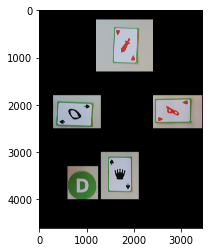

[[[ 51  92  34]
  [ 53  94  36]
  [ 52  93  35]
  ...
  [ 54  93  38]
  [ 53  94  38]
  [ 52  93  37]]

 [[ 51  92  34]
  [ 53  94  36]
  [ 54  95  37]
  ...
  [ 53  92  37]
  [ 51  92  36]
  [ 50  91  35]]

 [[ 54  95  39]
  [ 54  95  39]
  [ 54  95  37]
  ...
  [ 54  93  38]
  [ 52  93  37]
  [ 52  93  37]]

 ...

 [[ 50 100  41]
  [ 50 100  41]
  [ 51 101  42]
  ...
  [ 53 104  45]
  [ 52 103  44]
  [ 51 102  43]]

 [[ 50 100  41]
  [ 50 100  41]
  [ 51 101  42]
  ...
  [ 53 104  45]
  [ 51 102  43]
  [ 50 101  42]]

 [[ 50 100  41]
  [ 50 100  41]
  [ 51 101  42]
  ...
  [ 52 103  44]
  [ 52 103  44]
  [ 51 102  43]]]


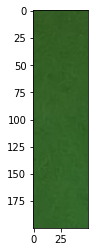

In [2]:
path = r"..\train_games\game1\1.jpg"
img = cv2.imread(path)
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# create a mask
mask1 = np.zeros(img.shape[:2], np.uint8)
mask2 = np.zeros(img.shape[:2], np.uint8)
mask3 = np.zeros(img.shape[:2], np.uint8)
mask4 = np.zeros(img.shape[:2], np.uint8)
mask_d = np.zeros(img.shape[:2], np.uint8)
mask1[3000:4000, 1300:2100] = 255
mask2[1800:2500, 2400:4000] = 255
mask3[200:1300, 1200:2400] = 255
mask4[1800:2500,300:1300] = 255
mask_d[3300:4000, 600:1250] = 255
mask =cv2.bitwise_or(mask1, mask2)
mask =cv2.bitwise_or(mask, mask3)
mask =cv2.bitwise_or(mask, mask4)
mask =cv2.bitwise_or(mask, mask_d)
masked_img = cv2.bitwise_and(img,img,mask = mask)
plt.imshow(masked_img)
plt.show()

green = masked_img[3600:3800, 650:700]
print(green)
plt.imshow(green)

# try to filter all green binary

In [3]:
path = r"..\train_games\game1\1.jpg"
img = cv2.imread(path)
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

lower_green = np.array([50, 90, 30],dtype = "uint8")
upper_green = np.array([60, 110, 50],dtype = "uint8")

mask = cv2.inRange(img, lower_green, upper_green)
result = cv2.bitwise_and(img, img, mask = mask)

cv2.imshow('img', img)
cv2.imshow('mask', mask)
cv2.imshow('result', result)
cv2.imshow("images", np.hstack([img, result]))
cv2.waitKey(0)


-1